In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [2]:
#data collection and processing
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
#Encoding the categorical data
#Fuel Type
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# #Seller Type
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#Transmission
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<AxesSubplot:>

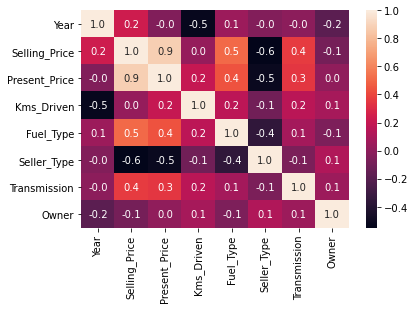

In [14]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')

In [9]:
df.Fuel_Type.dtypes

dtype('int64')

In [11]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
predict_train=model.predict(x_train)
print(predict_train)

[ 3.73088505e+00  5.60702081e+00  7.79779356e+00 -1.88374756e+00
  6.71614572e+00  8.14343296e+00  5.84067525e+00  6.17919527e+00
  6.15863751e+00  1.59459051e+01  2.15385926e+00  1.11618544e+00
 -4.05463414e-01  6.69051516e+00  6.81961414e+00  1.02957394e+00
  6.74306974e+00  1.43864300e+01  3.00001893e+00  7.95149024e+00
 -8.38569413e-01  9.02067892e+00  1.21210550e+00  2.20040027e+00
 -8.23744275e-01  7.52651502e-01  1.00142469e+01 -4.08950275e-01
 -2.40418357e+00  9.99845989e+00  6.81867179e+00  1.09249928e+00
  4.36158792e+00  9.20660480e-02  3.48993776e+00  2.78147834e+00
  1.50401026e+00  4.65736158e-01  1.68679810e+00  1.18722506e+00
  4.32936153e+00  6.09932798e+00  9.51639926e-01  7.52875828e-01
  6.05967594e+00  3.49453005e+00  2.40969246e+00  7.52230513e+00
  4.63113915e+00  4.44239322e+00  4.22460259e+00  2.71077171e+00
  4.46881874e+00  1.76156730e+00  2.86100050e-01  3.95181249e+00
  1.36371845e+00  4.63046605e+00  1.44343122e+00  7.27550233e+00
  7.26488044e+00  6.54659

In [21]:
#r squared error
score_1=metrics.r2_score(y_train,predict_train)
print("R squared error:",score_1)
predicted_test=model.predict(x_test)

R squared error: 0.8799451660493698


In [22]:
s2=metrics.r2_score(y_test,predicted_test)
print("R squared error of test data:",s2)

R squared error of test data: 0.8365766715026905


Text(0.5, 1.0, 'Actual vs. Predicted Price')

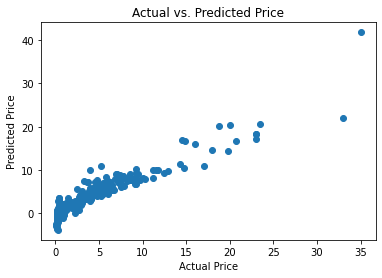

In [24]:
plt.scatter(y_train,predict_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')